In [53]:
import requests
import json

response = requests.get("https://api.opendota.com/api/matches/1636204962")
jjj = response.text
rc = json.loads(jjj)
print(rc)

{'tower_status_dire': 2038, 'chat': [{'key': 'LOL', 'time': 1719, 'unit': 'Injune', 'slot': 8, 'type': 'chat'}, {'key': 'Rofl', 'time': 2142, 'unit': 'Injune', 'slot': 8, 'type': 'chat'}, {'key': 'lol void', 'time': 2765, 'unit': 'R.R.', 'slot': 0, 'type': 'chat'}, {'key': 'void is not having a good day', 'time': 2873, 'unit': 'Kobold', 'slot': 9, 'type': 'chat'}, {'key': 'picks wrong challenge', 'time': 2879, 'unit': 'Kobold', 'slot': 9, 'type': 'chat'}, {'key': 'picks deal 1k damage in a second not win with void', 'time': 2893, 'unit': 'Kobold', 'slot': 9, 'type': 'chat'}, {'key': 'ROFL', 'time': 2913, 'unit': 'Injune', 'slot': 8, 'type': 'chat'}, {'key': 'HANGRY FOR TECHIES', 'time': 2925, 'unit': 'LAHEY', 'slot': 6, 'type': 'chat'}, {'key': 'GETS YOU NOUFING', 'time': 2929, 'unit': 'LAHEY', 'slot': 6, 'type': 'chat'}, {'key': 'GG', 'time': 2933, 'unit': 'LAHEY', 'slot': 6, 'type': 'chat'}, {'key': 'THRO OUT THE GG', 'time': 2938, 'unit': 'LAHEY', 'slot': 6, 'type': 'chat'}, {'key':

In [66]:
print(rc["players"][0]["account_id"])
print(rc["players"][0]["hero_id"])

132149728
14


In [38]:
list_ = []
for i in range(120):
    list_.append(0)
    
for member in rc:
    list_[int(member["hero_id"])-1] = 1
    
for i in range(120):
    if list_[i]==0:
        print(i+1)

24
115
116
117
118


In [51]:
# api functions
# see 'https://docs.opendota.com/#' for details

def get_player_wl(player_id):
    url_1 = "https://api.opendota.com/api/players/"
    url_2 = "/wl"
    response = requests.get(url_1+player_id+url_2).text
    rc = json.loads(response)
    return rc


# hero_id range from 1 to 120, excluding 24, 115, 116, 117, 118
def get_player_hero(player_id, hero_id):
    url_1 = "https://api.opendota.com/api/players/"
    url_2 = "/heroes"
    response = requests.get(url_1+player_id+url_2).text
    rc = json.loads(response)
    for member in rc:
        if member["hero_id"]==hero_id:
            return member

        
def get_hero(hero_id):
    url = "https://api.opendota.com/api/heroStats"
    response = requests.get(url).text
    rc = json.loads(response)
    for member in rc:
        if member["hero_id"]==int(hero_id):
            return member

In [52]:
dic = get_hero("20")
print(dic)

{'str_gain': 2.9, 'img': '/apps/dota2/images/heroes/vengefulspirit_full.png?', 'cm_enabled': True, '5000_pick': 633, '1000_win': 1987, 'attack_range': 400, 'base_mana_regen': 0.9, 'legs': 2, 'base_str': 18, 'base_agi': 27, 'agi_gain': 3.3, 'base_mr': 25, 'base_health': 200, 'base_int': 13, '3000_win': 6605, 'turn_rate': 0.6, 'base_health_regen': 1.5, 'roles': ['Support', 'Initiator', 'Disabler', 'Nuker', 'Escape'], '5000_win': 340, 'localized_name': 'Vengeful Spirit', 'pro_win': 82, 'base_attack_max': 20, 'attack_rate': 1.7, '2000_pick': 9023, '4000_pick': 4108, 'icon': '/apps/dota2/images/heroes/vengefulspirit_icon.png', 'int_gain': 1.5, '3000_pick': 12047, 'primary_attr': 'agi', 'move_speed': 295, '4000_win': 2270, 'id': 20, 'hero_id': 20, 'attack_type': 'Ranged', 'pro_ban': 126, 'name': 'npc_dota_hero_vengefulspirit', 'base_mana': 75, '2000_win': 4974, 'base_armor': 0, 'base_attack_min': 12, '1000_pick': 3687, 'pro_pick': 149, 'projectile_speed': 1500}


In [1]:
import csv
import numpy as np

train_data_g2 = []
train_data_g4 = []
train_data_g6 = []
train_data_g8 = []
train_data_g0 = []
train_data_x2 = []
train_data_x4 = []
train_data_x6 = []
train_data_x8 = []
train_data_x0 = []
train_label = []

with open('pergold1.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        train_data_g2.append(int(row['rg2']))
        train_data_g4.append(int(row['rg4']))
        train_data_g6.append(int(row['rg6']))
        train_data_g8.append(int(row['rg8']))
        train_data_g0.append(int(row['rg10']))
        train_data_x2.append(int(row['rx2']))
        train_data_x4.append(int(row['rx4']))
        train_data_x6.append(int(row['rx6']))
        train_data_x8.append(int(row['rx8']))
        train_data_x0.append(int(row['rx10']))
        train_label.append(float(row['rwin']))

train_data_g2 = np.expand_dims(np.asarray(train_data_g2), 1)
train_data_g4 = np.expand_dims(np.asarray(train_data_g4), 1)
train_data_g6 = np.expand_dims(np.asarray(train_data_g6), 1)
train_data_g8 = np.expand_dims(np.asarray(train_data_g8), 1)
train_data_g0 = np.expand_dims(np.asarray(train_data_g0), 1)
train_data_x2 = np.expand_dims(np.asarray(train_data_x2), 1)
train_data_x4 = np.expand_dims(np.asarray(train_data_x4), 1)
train_data_x6 = np.expand_dims(np.asarray(train_data_x6), 1)
train_data_x8 = np.expand_dims(np.asarray(train_data_x8), 1)
train_data_x0 = np.expand_dims(np.asarray(train_data_x0), 1)
train_label = np.asarray(train_label)

In [2]:
from sklearn import linear_model

LR_g2 = linear_model.LogisticRegression(C=1e5).fit(train_data_g2, train_label)
LR_g4 = linear_model.LogisticRegression(C=1e5).fit(train_data_g4, train_label)
LR_g6 = linear_model.LogisticRegression(C=1e5).fit(train_data_g6, train_label)
LR_g8 = linear_model.LogisticRegression(C=1e5).fit(train_data_g8, train_label)
LR_g0 = linear_model.LogisticRegression(C=1e5).fit(train_data_g0, train_label)
LR_x2 = linear_model.LogisticRegression(C=1e5).fit(train_data_x2, train_label)
LR_x4 = linear_model.LogisticRegression(C=1e5).fit(train_data_x4, train_label)
LR_x6 = linear_model.LogisticRegression(C=1e5).fit(train_data_x6, train_label)
LR_x8 = linear_model.LogisticRegression(C=1e5).fit(train_data_x8, train_label)
LR_x0 = linear_model.LogisticRegression(C=1e5).fit(train_data_x0, train_label)

In [3]:
predict = LR_g0.predict_proba(50000)[0][1]
print(predict)

0.999999861529


In [1]:
import wx
import requests
import json
import os
import shutil
import math
import numpy as np
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
from matplotlib.backends.backend_wx import NavigationToolbar2Wx
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf, setp

DefaultSize = (1000, 500)
DefaultSizeMain = (1920, 1080)
ColorBackground = "#202020"
ColorText = "#A0A0A0"
ColorButton = "#606060"
ColorRadiant = "#FF0000"
ColorDire = "#00CC00"
ColorPlayer = "#EEEE00"

class Param:
    """

    """
    def __init__(self, initialValue=None, minimum=0., maximum=1.):
        self.minimum = minimum
        self.maximum = maximum
        if initialValue != self.constrain(initialValue):
            raise ValueError('illegal initial value')
        self.value = initialValue
        self.knobs = []
        
    def attach(self, knob):
        self.knobs += [knob]
        
    def set(self, value, knob=None):
        self.value = value
        self.value = self.constrain(value)
        for feedbackKnob in self.knobs:
            if feedbackKnob != knob:
                feedbackKnob.setKnob(self.value)
        return self.value

    def constrain(self, value):
        if value <= self.minimum:
            value = self.minimum
        if value >= self.maximum:
            value = self.maximum
        return value

class FourierDemoFrame(wx.Frame):
    def __init__(self, *args, **kwargs):
        wx.Frame.__init__(self, *args, **kwargs)

        self.fourierDemoWindow = FourierDemoWindow(self)

        sizer = wx.BoxSizer(wx.VERTICAL)
        sizer.Add(self.fourierDemoWindow, 1, wx.EXPAND)
        self.SetSizer(sizer)


class CanvasFrame(wx.Frame):
    def __init__(self, rc, str_):
        wx.Frame.__init__(self, None, title="Real Time "+str_+" Comparison", size=DefaultSize)
        self.figure = Figure(facecolor=ColorBackground, edgecolor=ColorBackground)
        self.lines = []
        self.canvas = FigureCanvas(self, -1, self.figure)
        self.axes = self.figure.add_subplot(111)
        self.canvas.callbacks.connect('button_press_event', self.mouseDown)
        self.canvas.callbacks.connect('motion_notify_event', self.mouseMotion)
        self.canvas.callbacks.connect('button_release_event', self.mouseUp)
        self.state = ''
        self.mouseInfo = (None, None, None, None)
        if str_=="Gold":
            select = "gold_t"
        else:
            select = "xp_t"
        self.str = str_
        PlayersStats = []
        for i in range(10):
            PlayersStats.append(rc["players"][i][select])
        PlayersStats = np.asarray(PlayersStats)
        RadiantStats = sum(PlayersStats[0:5])
        DireStats = sum(PlayersStats[5:10])
        RadiantAdv = (RadiantStats - DireStats).tolist()
        x = []
        base = []
        for i in range(len(RadiantAdv)):
            x.append(i)
            base.append(0)
        x = np.asarray(x)
        base = np.asarray(base)
        self.lower = min(RadiantAdv)
        self.upper = max(RadiantAdv)
        RadiantAdv = np.asarray(RadiantAdv)
        self.axes.plot(x, RadiantAdv, x, base, color=ColorText, mec=ColorBackground, mfc=ColorBackground)
        self.axes.fill_between(x, RadiantAdv, base, where=RadiantAdv>=base, facecolor=ColorRadiant, interpolate=True)
        self.axes.fill_between(x, RadiantAdv, base, where=RadiantAdv<=base, facecolor=ColorDire, interpolate=True)
        self.axes.set_xlabel('time/minute', {'color':ColorText})
        self.axes.set_ylabel('Radiant '+str_+' Adv', {'color':ColorText})
        self.axes.set_facecolor(ColorBackground)
        self.axes.set_xticklabels(self.axes.get_xticks(), color=ColorText)
        self.axes.set_yticklabels(self.axes.get_yticks(), color=ColorText)
        self.axes.tick_params(axis='both', color=ColorText)
        self.axes.set_frame_on(False)
        self.f0 = Param(0., minimum=0., maximum=float(len(x)))
        self.RadiantAdv = RadiantAdv
        self.draw()
        self.f0.attach(self)
        self.Bind(wx.EVT_SIZE, self.sizeHandler)
        
    def sizeHandler(self, *args, **kwargs):
        self.canvas.SetSize(self.GetSize())
        
    def mouseDown(self, evt):
        if self.lines[0] in self.figure.hitlist(evt):
            self.state = 'frequency'
        else:
            self.state = ''
        self.mouseInfo = (evt.xdata, evt.ydata, self.f0.value)

    def mouseMotion(self, evt):
        if self.state == '':
            return
        x, y = evt.xdata, evt.ydata
        if x is None:  # outside the axes
            return
        x0, y0, f0Init = self.mouseInfo
        if self.state == 'frequency':
            self.f0.set((x-x0)+f0Init)
                    
    def mouseUp(self, evt):
        self.state = ''

    def draw(self):
        x1, y1 = self.compute(self.f0.value)
        self.lines += self.axes.plot(x1, y1, color=ColorText, linewidth=1)
        time = self.f0.value
        preIndex = math.floor(time)
        posIndex = math.ceil(time)
        RadiantAdv = (self.RadiantAdv[posIndex]-self.RadiantAdv[preIndex])*(time-preIndex)
        RadiantWinRate = 0.5
        self.text1 = self.axes.text(0.05, .95, "time: "+str(time), verticalalignment='top', transform = self.axes.transAxes, color = ColorText)
        self.text2 = self.axes.text(0.05, .90, "adv: "+str(RadiantAdv), verticalalignment='top', transform = self.axes.transAxes, color = ColorText)
        self.text3 = self.axes.text(0.05, .85, "winRate: "+str(RadiantWinRate), verticalalignment='top', transform = self.axes.transAxes, color = ColorText)
        
        
    def compute(self, f0):
        x = np.arange(self.lower, self.upper, 10)
        f = np.full(x.shape, f0)
        return f, x

    def repaint(self):
        time = self.f0.value
        preIndex = math.floor(time)
        posIndex = math.ceil(time)
        RadiantAdv = (self.RadiantAdv[posIndex]-self.RadiantAdv[preIndex])*(time-preIndex) + self.RadiantAdv[preIndex]
        time_ratio = time/len(self.RadiantAdv)
        if self.str=="Gold":
            if time_ratio<0.2:
                RadiantWinRate = LR_g2.predict_proba(RadiantAdv)[0][1]
            elif time_ratio<0.4:
                RadiantWinRate = LR_g4.predict_proba(RadiantAdv)[0][1]
            elif time_ratio<0.4:
                RadiantWinRate = LR_g6.predict_proba(RadiantAdv)[0][1]
            elif time_ratio<0.4:
                RadiantWinRate = LR_g8.predict_proba(RadiantAdv)[0][1]
            else:
                RadiantWinRate = LR_g0.predict_proba(RadiantAdv)[0][1]
        else:
            if time_ratio<0.2:
                RadiantWinRate = LR_x2.predict_proba(RadiantAdv)[0][1]
            elif time_ratio<0.4:
                RadiantWinRate = LR_x4.predict_proba(RadiantAdv)[0][1]
            elif time_ratio<0.4:
                RadiantWinRate = LR_x6.predict_proba(RadiantAdv)[0][1]
            elif time_ratio<0.4:
                RadiantWinRate = LR_x8.predict_proba(RadiantAdv)[0][1]
            else:
                RadiantWinRate = LR_x0.predict_proba(RadiantAdv)[0][1]
        self.text1.set_text("time: "+str(time))
        self.text2.set_text("adv: "+str(RadiantAdv))
        self.text3.set_text("winRate: "+str(RadiantWinRate))
        self.canvas.draw()

    def setKnob(self, value):
        # Note, we ignore value arg here and just go by state of the params
        x1, y1 = self.compute(self.f0.value)
        setp(self.lines[0], xdata=x1, ydata=y1)
        self.repaint()

class HelloFrame(wx.Frame):

    def __init__(self):
        wx.Frame.__init__(self, None, title="Dota WL Predictor", size=DefaultSizeMain)
        #self.SetBackgroundColour(ColorBackground)
        
        # create a panel in the frame
        pnl = wx.Panel(self)
        pnl.SetBackgroundColour(ColorBackground)
        self.pnl = pnl

        # and put some text with a larger bold font on it
        st = wx.StaticText(pnl, label="Dota2 Statistics", pos=(25,25))
        st.SetForegroundColour(ColorText)
        TitleFont = wx.Font(40, wx.SCRIPT, wx.NORMAL, wx.BOLD, False)
        st.SetFont(TitleFont)

        # and a status bar
        self.CreateStatusBar()
        self.SetStatusText("Welcome to wxPython!")  
        
        # get match information
        TextTitle = wx.StaticText(pnl, label="Enter an match ID", pos=(100, 100))
        TextTitle.SetForegroundColour(ColorText)
        self.txt = wx.TextCtrl(pnl, pos=(100, 125), style=wx.NO_BORDER)
        self.txt.SetForegroundColour(ColorText)
        self.txt.SetBackgroundColour("#181818")
        self.btn = []
        self.btn.append(wx.Button(pnl, label='Load Match', pos=(100,175), style=wx.NO_BORDER))
        self.btn[0].SetBackgroundColour(ColorBackground)
        self.btn[0].SetForegroundColour(ColorText)
        self.btn.append(wx.Button(pnl, label='Show Gold', pos=(225,175), style=wx.NO_BORDER))
        self.btn[1].SetBackgroundColour(ColorBackground)
        self.btn[1].SetForegroundColour(ColorText)
        self.btn.append(wx.Button(pnl, label='Show Exp', pos=(350,175), style=wx.NO_BORDER))
        self.btn[2].SetBackgroundColour(ColorBackground)
        self.btn[2].SetForegroundColour(ColorText)
        self.btn.append(wx.Button(pnl, label='Show Stat R', pos=(225,750), style=wx.NO_BORDER))
        self.btn[3].SetBackgroundColour(ColorBackground)
        self.btn[3].SetForegroundColour(ColorText)
        self.btn.append(wx.Button(pnl, label='Show Stat D', pos=(350,750), style=wx.NO_BORDER))
        self.btn[4].SetBackgroundColour(ColorBackground)
        self.btn[4].SetForegroundColour(ColorText)
        self.btn[0].Bind(wx.EVT_BUTTON, self.GetMatch)
        self.btn[0].Bind(wx.EVT_ENTER_WINDOW, lambda event: self.MouseOver(event, 0))
        self.btn[0].Bind(wx.EVT_LEAVE_WINDOW, lambda event: self.MouseLeave(event, 0))
        self.btn[1].Bind(wx.EVT_BUTTON, self.ShowGold)
        self.btn[1].Bind(wx.EVT_ENTER_WINDOW, lambda event: self.MouseOver(event, 1))
        self.btn[1].Bind(wx.EVT_LEAVE_WINDOW, lambda event: self.MouseLeave(event, 1))
        self.btn[2].Bind(wx.EVT_BUTTON, self.ShowExp)
        self.btn[2].Bind(wx.EVT_ENTER_WINDOW, lambda event: self.MouseOver(event, 2))
        self.btn[2].Bind(wx.EVT_LEAVE_WINDOW, lambda event: self.MouseLeave(event, 2))
        self.btn[3].Bind(wx.EVT_BUTTON, self.ShowStatR)
        self.btn[3].Bind(wx.EVT_ENTER_WINDOW, lambda event: self.MouseOver(event, 3))
        self.btn[3].Bind(wx.EVT_LEAVE_WINDOW, lambda event: self.MouseLeave(event, 3))
        self.btn[4].Bind(wx.EVT_BUTTON, self.ShowStatD)
        self.btn[4].Bind(wx.EVT_ENTER_WINDOW, lambda event: self.MouseOver(event, 4))
        self.btn[4].Bind(wx.EVT_LEAVE_WINDOW, lambda event: self.MouseLeave(event, 4))
        
    def ShowStatR(self, event):
        bitmap = wx.Bitmap('temp/xp_R.png', wx.BITMAP_TYPE_ANY)
        image = wx.ImageFromBitmap(bitmap)
        image = image.Scale(400, 250, wx.IMAGE_QUALITY_HIGH)
        bitmap = wx.BitmapFromImage(image)
        wx.StaticBitmap(self.pnl, -1, bitmap, pos=(50,225))
        bitmap = wx.Bitmap('temp/go_R.png', wx.BITMAP_TYPE_ANY)
        image = wx.ImageFromBitmap(bitmap)
        image = image.Scale(400, 250, wx.IMAGE_QUALITY_HIGH)
        bitmap = wx.BitmapFromImage(image)
        wx.StaticBitmap(self.pnl, -1, bitmap, pos=(50,475))
        
    def ShowStatD(self, event):
        bitmap = wx.Bitmap('temp/xp_D.png', wx.BITMAP_TYPE_ANY)
        image = wx.ImageFromBitmap(bitmap)
        image = image.Scale(400, 250, wx.IMAGE_QUALITY_HIGH)
        bitmap = wx.BitmapFromImage(image)
        wx.StaticBitmap(self.pnl, -1, bitmap, pos=(50,225))
        bitmap = wx.Bitmap('temp/go_D.png', wx.BITMAP_TYPE_ANY)
        image = wx.ImageFromBitmap(bitmap)
        image = image.Scale(400, 250, wx.IMAGE_QUALITY_HIGH)
        bitmap = wx.BitmapFromImage(image)
        wx.StaticBitmap(self.pnl, -1, bitmap, pos=(50,475))
    
    def MouseOver(self, event, index):
        self.btn[index].SetBackgroundColour(ColorButton)
        event.Skip()
        
    def MouseLeave(self, event, index):
        self.btn[index].SetBackgroundColour(ColorBackground)
        event.Skip()
        
    def GetMatch(self, event):
        content = self.txt.GetLineText(0)
        response = requests.get("https://api.opendota.com/api/matches/"+content).text
        rc = json.loads(response)
        self.rc = rc
        self.ShowMatchInfo()
        self.PlotStats()
        wx.MessageBox("Loading is done!")
        
    def PlotStats(self):
        players_xp = []
        players_go = []
        rc = self.rc
        for i in range(10):
            players_xp.append(rc["players"][i]["xp_t"])
            players_go.append(rc["players"][i]["gold_t"])
        players_xp = np.asarray(players_xp)
        players_go = np.asarray(players_go)
        base = range(5)
        index = len(players_xp)-1
        acc = []
        for i in range(10):
            acc.append(sum(players_xp[0:i,index]))
        acc = np.asarray(acc)
        # plot xp radiant
        figure = plt.figure(facecolor=ColorBackground, edgecolor=ColorBackground)
        axes = figure.add_subplot(111)
        top = sum(players_xp[0:5,index])
        axes.bar(base, acc[0:5], label='others', color=ColorRadiant)
        axes.bar(base, players_xp[0:5,index], bottom=acc[0:5], label='player', color=ColorPlayer)
        axes.bar(base, top-acc[0:5]-players_xp[0:5,index], bottom=acc[0:5]+players_xp[0:5,index], label='others', color=ColorRadiant)
        axes.set_xlabel('Players', {'color':ColorText})
        axes.set_ylabel('Exp percentage', {'color':ColorText})
        axes.set_facecolor(ColorBackground)
        axes.set_xticklabels(axes.get_xticks(), color=ColorText)
        axes.set_yticklabels(axes.get_yticks(), color=ColorText)
        axes.tick_params(axis='both', color=ColorText)
        axes.set_frame_on(False)
        figure.savefig('temp/xp_R.png', facecolor=ColorBackground, edgecolor=ColorBackground)
        # plot xp dire
        figure = plt.figure(facecolor=ColorBackground, edgecolor=ColorBackground)
        axes = figure.add_subplot(111)
        top = sum(players_xp[5:10,index])
        axes.bar(base, acc[5:10]-acc[5], label='others', color=ColorDire)
        axes.bar(base, players_xp[5:10,index], bottom=acc[5:10]-acc[5], label='player', color=ColorPlayer)
        axes.bar(base, top-acc[5:10]+acc[5]-players_xp[5:10,index], bottom=acc[5:10]-acc[5]+players_xp[5:10,index], label='others', color=ColorDire)
        axes.set_xlabel('Players', {'color':ColorText})
        axes.set_ylabel('Exp percentage', {'color':ColorText})
        axes.set_facecolor(ColorBackground)
        axes.set_xticklabels(axes.get_xticks(), color=ColorText)
        axes.set_yticklabels(axes.get_yticks(), color=ColorText)
        axes.tick_params(axis='both', color=ColorText)
        axes.set_frame_on(False)
        figure.savefig('temp/xp_D.png', facecolor=ColorBackground, edgecolor=ColorBackground)
        
        acc = []
        for i in range(10):
            acc.append(sum(players_go[0:i,index]))
        acc = np.asarray(acc)
        # plot gold radiant
        figure = plt.figure(facecolor=ColorBackground, edgecolor=ColorBackground)
        axes = figure.add_subplot(111)
        top = sum(players_go[0:5,index])
        axes.bar(base, acc[0:5], label='others', color=ColorRadiant)
        axes.bar(base, players_go[0:5,index], bottom=acc[0:5], label='player', color=ColorPlayer)
        axes.bar(base, top-acc[0:5]-players_go[0:5,index], bottom=acc[0:5]+players_go[0:5,index], label='others', color=ColorRadiant)
        axes.set_xlabel('Players', {'color':ColorText})
        axes.set_ylabel('Golg percentage', {'color':ColorText})
        axes.set_facecolor(ColorBackground)
        axes.set_xticklabels(axes.get_xticks(), color=ColorText)
        axes.set_yticklabels(axes.get_yticks(), color=ColorText)
        axes.tick_params(axis='both', color=ColorText)
        axes.set_frame_on(False)
        figure.savefig('temp/go_R.png', facecolor=ColorBackground, edgecolor=ColorBackground)
        # plot gold dire
        figure = plt.figure(facecolor=ColorBackground, edgecolor=ColorBackground)
        axes = figure.add_subplot(111)
        top = sum(players_go[5:10,index])
        axes.bar(base, acc[5:10]-acc[5], label='others', color=ColorDire)
        axes.bar(base, players_go[5:10,index], bottom=acc[5:10]-acc[5], label='player', color=ColorPlayer)
        axes.bar(base, top-acc[5:10]+acc[5]-players_go[5:10,index], bottom=acc[5:10]-acc[5]+players_go[5:10,index], label='others', color=ColorDire)
        axes.set_xlabel('Players', {'color':ColorText})
        axes.set_ylabel('Gold percentage', {'color':ColorText})
        axes.set_facecolor(ColorBackground)
        axes.set_xticklabels(axes.get_xticks(), color=ColorText)
        axes.set_yticklabels(axes.get_yticks(), color=ColorText)
        axes.tick_params(axis='both', color=ColorText)
        axes.set_frame_on(False)
        figure.savefig('temp/go_D.png', facecolor=ColorBackground, edgecolor=ColorBackground)
        
    def ShowGold(self, event):
        frame = CanvasFrame(self.rc, 'Gold')
        frame.Show()
        
    def ShowExp(self, event):
        frame = CanvasFrame(self.rc, 'Exp')
        frame.Show()

    def ShowMatchInfo(self):
        rc = self.rc
        Heros = []
        for i in range(10):
            Heros.append(rc["players"][i]["hero_id"])
        self.ShowHeros(Heros)
        self.ShowPlayers()
        
    def ShowHeros(self, Heros):
        HeroStats = json.loads(requests.get("https://api.opendota.com/api/heroStats").text)
        team = wx.StaticText(self.pnl, label="Radiant", pos=(500,50))
        font = team.GetFont()
        font.PointSize += 10
        font = font.Bold()
        team.SetFont(font)
        team.SetForegroundColour(ColorRadiant)
        text = wx.StaticText(self.pnl, label="hero & player", pos=(660,50))
        text.SetForegroundColour(ColorText)
        text = wx.StaticText(self.pnl, label="KDA", pos=(820,50))
        text.SetForegroundColour(ColorText)
        text = wx.StaticText(self.pnl, label="gold per min", pos=(980,50))
        text.SetForegroundColour(ColorText)
        text = wx.StaticText(self.pnl, label="exp per min", pos=(1140,50))
        text.SetForegroundColour(ColorText)
        text = wx.StaticText(self.pnl, label="kill per min", pos=(1300,50))
        text.SetForegroundColour(ColorText)
        for i in range(5):
            StartIndex = 0
            if int(Heros[i])<len(HeroStats):
                StartIndex = int(Heros[i])
            else:
                StartIndex = len(HeroStats)-1
            while int(HeroStats[StartIndex]["id"])!=int(Heros[i]):
                StartIndex -= 1
            url = "https://api.opendota.com"+HeroStats[StartIndex]["img"]
            response = requests.get(url, stream=True)
            with open("temp/img", "wb") as out_file:
                shutil.copyfileobj(response.raw, out_file)
            bitmap = wx.Bitmap("temp/img", wx.BITMAP_TYPE_ANY)
            image = wx.ImageFromBitmap(bitmap)
            image = image.Scale(100, 50, wx.IMAGE_QUALITY_HIGH)
            bitmap = wx.BitmapFromImage(image)
            wx.StaticBitmap(self.pnl, -1, bitmap, pos=(500,100+i*60))
            text = wx.StaticText(self.pnl, label=HeroStats[StartIndex]["localized_name"], pos=(650,100+i*60))
            text.SetForegroundColour(ColorText)
            os.remove("temp/img")
        team = wx.StaticText(self.pnl, label="Dire", pos=(500,420))
        font = team.GetFont()
        font.PointSize += 10
        font = font.Bold()
        team.SetFont(font)
        team.SetForegroundColour(ColorDire)
        for i in range(5):
            StartIndex = 0
            if int(Heros[i+5])<len(HeroStats):
                StartIndex = int(Heros[i+5])
            else:
                StartIndex = len(HeroStats)-1
            while int(HeroStats[StartIndex]["id"])!=int(Heros[i+5]):
                StartIndex -= 1
            url = "https://api.opendota.com"+HeroStats[StartIndex]["img"]
            response = requests.get(url, stream=True)
            with open("temp/img", "wb") as out_file:
                shutil.copyfileobj(response.raw, out_file)
            bitmap = wx.Bitmap("temp/img", wx.BITMAP_TYPE_ANY)
            image = wx.ImageFromBitmap(bitmap)
            image = image.Scale(100, 50, wx.IMAGE_QUALITY_HIGH)
            bitmap = wx.BitmapFromImage(image)
            wx.StaticBitmap(self.pnl, -1, bitmap, pos=(500,470+i*60))
            text = wx.StaticText(self.pnl, label=HeroStats[StartIndex]["localized_name"], pos=(650,470+i*60))
            text.SetForegroundColour(ColorText)
            os.remove("temp/img")
        
        
    def ShowPlayers(self):
        rc = self.rc
        for i in range(5):
            kda = str(rc["players"][i]["kills"])+"/"
            kda += str(rc["players"][i]["deaths"])+"/"
            kda += str(rc["players"][i]["assists"])
            text = wx.StaticText(self.pnl, label=kda, pos=(820,120+i*60))
            text.SetForegroundColour(ColorText)
            text = wx.StaticText(self.pnl, label=str(rc["players"][i]["gold_per_min"]), pos=(980,120+i*60))
            text.SetForegroundColour(ColorText)
            text = wx.StaticText(self.pnl, label=str(rc["players"][i]["xp_per_min"]), pos=(1140,120+i*60))
            text.SetForegroundColour(ColorText)
            text = wx.StaticText(self.pnl, label=str(rc["players"][i]["kills"]/rc["duration"]*60)[:5], pos=(1300,120+i*60))
            text.SetForegroundColour(ColorText)
            if rc["players"][i]["name"] is None:
                text = wx.StaticText(self.pnl, label="unknown", pos=(660,120+i*60))
                text.SetForegroundColour(ColorText)
                continue
            text = wx.StaticText(self.pnl, label=rc["players"][i]["name"]+"("+str(rc["players"][i]["account_id"])+")", pos=(660,120+i*60))
            text.SetForegroundColour(ColorText)
            
        for i in range(5):
            kda = str(rc["players"][i+5]["kills"])+"/"
            kda += str(rc["players"][i+5]["deaths"])+"/"
            kda += str(rc["players"][i+5]["assists"])
            text = wx.StaticText(self.pnl, label=kda, pos=(820,490+i*60))
            text.SetForegroundColour(ColorText)
            text = wx.StaticText(self.pnl, label=str(rc["players"][i+5]["gold_per_min"]), pos=(980,490+i*60))
            text.SetForegroundColour(ColorText)
            text = wx.StaticText(self.pnl, label=str(rc["players"][i+5]["xp_per_min"]), pos=(1140,490+i*60))
            text.SetForegroundColour(ColorText)
            text = wx.StaticText(self.pnl, label=str(rc["players"][i+5]["kills"]/rc["duration"]*60)[:5], pos=(1300,490+i*60))
            text.SetForegroundColour(ColorText)
            if rc["players"][i+5]["name"] is None:
                text = wx.StaticText(self.pnl, label="unknown", pos=(660,490+i*60))
                text.SetForegroundColour(ColorText)
                continue
            text = wx.StaticText(self.pnl, label=rc["players"][i+5]["name"]+"("+str(rc["players"][i+5]["account_id"])+")", pos=(660,490+i*60))
            text.SetForegroundColour(ColorText)
            
        
app = wx.App()
frm = HelloFrame()
frm.Show()
app.MainLoop()

D:\py\envs\ECBM4040\lib\site-packages\ipykernel_launcher.py:422: wxPyDeprecationWarning: Call to deprecated item ImageFromBitmap. Use bitmap.ConvertToImage instead.
D:\py\envs\ECBM4040\lib\site-packages\ipykernel_launcher.py:424: wxPyDeprecationWarning: Call to deprecated item BitmapFromImage. Use :class:`wx.Bitmap` instead
D:\py\envs\ECBM4040\lib\site-packages\ipykernel_launcher.py:448: wxPyDeprecationWarning: Call to deprecated item ImageFromBitmap. Use bitmap.ConvertToImage instead.
D:\py\envs\ECBM4040\lib\site-packages\ipykernel_launcher.py:450: wxPyDeprecationWarning: Call to deprecated item BitmapFromImage. Use :class:`wx.Bitmap` instead


0

read players stats

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

response = requests.get("https://api.opendota.com/api/matches/3584655604").text
rc = json.loads(response)
players_gold = []
players_xp = []
for i in range(10):
    players_gold.append(rc["players"][i]["gold_t"])
    players_xp.append(rc["players"][i]["xp_t"])
    
players_gold = np.asarray(players_gold)
players_xp = np.asarray(players_xp)

radiant_gold = sum(players_gold[0:5])
radiant_xp = sum(players_xp[0:5])
dire_gold = sum(players_gold[5:10])
dire_xp = sum(players_xp[5:10])

print(radiant_gold)

[     0    879   1927   2991   4735   6181   7454   8985  10475  12845
  13889  15512  17705  18786  20139  21209  24087  26218  28993  31347
  34747  36824  40237  43390  45861  48287  50029  53278  55008  57334
  59693  63477  65757  71718  73488  75358  81465  83958  85656  90471
  91665  93067  94578  97884 102015 102015]


draw gold diff curve

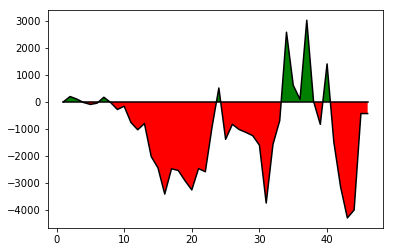

In [50]:
import matplotlib.pyplot as plt

radiant_gold_adv = (radiant_gold - dire_gold).tolist()

x = []
base = []
for i in range(len(radiant_gold)):
    x.append(i+1)
    base.append(0)

fig, ax = plt.subplots()

x = np.asarray(x)
base = np.asarray(base)
radiant_gold_adv = np.asarray(radiant_gold_adv)

ax.plot(x, radiant_gold_adv, x, base, color='black')
ax.fill_between(x, radiant_gold_adv, base, where=radiant_gold_adv>=base, facecolor='green', interpolate=True)
ax.fill_between(x, radiant_gold_adv, base, where=radiant_gold_adv<=base, facecolor='red', interpolate=True)

plt.show()

draw exp diff curve

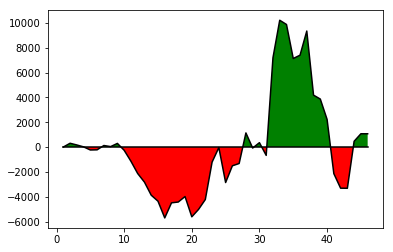

In [51]:
import matplotlib.pyplot as plt

radiant_xp_adv = (radiant_xp - dire_xp).tolist()

x = []
base = []
for i in range(len(radiant_gold)):
    x.append(i+1)
    base.append(0)

fig, ax = plt.subplots()

x = np.asarray(x)
base = np.asarray(base)
radiant_xp_adv = np.asarray(radiant_xp_adv)

ax.plot(x, radiant_xp_adv, x, base, color='black')
ax.fill_between(x, radiant_xp_adv, base, where=radiant_xp_adv>=base, facecolor='green', interpolate=True)
ax.fill_between(x, radiant_xp_adv, base, where=radiant_xp_adv<=base, facecolor='red', interpolate=True)

plt.show()

In [52]:
duration = rc["duration"]
print(duration)


2610


In [2]:
import requests
import json

response = requests.get("https://api.opendota.com/api/heroStats").text
rc = json.loads(response)
print(rc)

[{'str_gain': 1.3, '2000_win': 15596, '1000_pick': 12301, 'projectile_speed': 0, '5000_pick': 2073, '5000_win': 1047, 'icon': '/apps/dota2/images/heroes/antimage_icon.png', 'agi_gain': 2.8, 'base_health_regen': 1.5, '4000_pick': 12983, 'cm_enabled': True, 'pro_ban': 248, 'pro_win': 48, '2000_pick': 29603, 'id': 1, 'localized_name': 'Anti-Mage', 'base_attack_max': 31, '3000_win': 20128, 'base_mr': 25, 'roles': ['Carry', 'Escape', 'Nuker'], 'primary_attr': 'agi', 'turn_rate': 0.5, 'base_str': 22, 'attack_type': 'Melee', 'base_mana': 75, 'base_armor': -1, '3000_pick': 37837, 'int_gain': 1.8, '4000_win': 6869, 'pro_pick': 91, 'base_attack_min': 27, 'img': '/apps/dota2/images/heroes/antimage_full.png?', 'hero_id': 1, 'name': 'npc_dota_hero_antimage', 'move_speed': 310, 'base_agi': 22, 'attack_rate': 1.45, 'base_int': 12, 'base_mana_regen': 0.9, 'attack_range': 150, 'base_health': 200, '1000_win': 6318, 'legs': 2}, {'str_gain': 2.8, '2000_win': 9078, '1000_pick': 8438, 'projectile_speed': 90

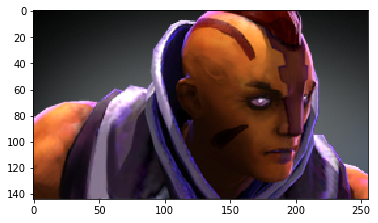

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import os

response = requests.get("https://api.opendota.com/apps/dota2/images/heroes/antimage_full.png?", stream=True)
with open("temp/img.png", "wb") as out_file:
    shutil.copyfileobj(response.raw, out_file)
    
img = mpimg.imread("temp/img.png")
plt.imshow(img)
plt.show()
os.remove("temp/img.png")
    


In [7]:
response = requests.get("https://api.opendota.com/api/matches/3584655604").text
rc = json.loads(response)
for key in rc["players"][0]:
    print(key)

backpack_0
tower_kills
damage
lane_kills
item_0
duration
actions_per_min
last_login
total_xp
purchase_tpscroll
gold_per_min
cluster
name
isRadiant
stuns
player_slot
times
lh_t
kill_streaks
damage_inflictor_received
benchmarks
level
firstblood_claimed
patch
neutral_kills
obs_left_log
party_id
backpack_2
hero_kills
cosmetics
item_4
purchase_time
item_uses
courier_kills
hero_id
damage_taken
multi_kills
item_3
damage_inflictor
repicked
obs_log
item_2
item_usage
abandons
sen_left_log
actions
sen
hero_hits
leaver_status
observer_kills
creeps_stacked
xp_reasons
runes
permanent_buffs
xp_t
buyback_log
ancient_kills
gold_spent
sentry_uses
buyback_count
roshan_kills
xp_per_min
item_1
last_hits
kills
personaname
sen_placed
match_id
purchase_log
lane_role
lane_efficiency
max_hero_hit
party_size
additional_units
runes_log
radiant_win
observer_uses
dn_t
sentry_kills
win
kills_log
randomed
killed
is_roaming
necronomicon_kills
roshans_killed
lane
pings
killed_by
towers_killed
life_state
performance_oth

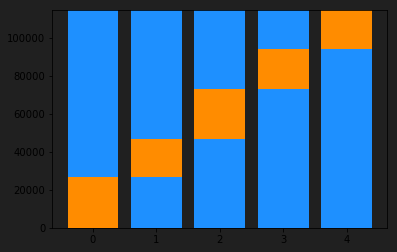

In [6]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

url = "https://api.opendota.com/api/matches/3591047372"
response = requests.get(url).text
rc = json.loads(response)

players_xp = []
players_go = []

for i in range(10):
    players_xp.append(rc["players"][i]["xp_t"])
    players_go.append(rc["players"][i]["gold_t"])
    
players_xp = np.asarray(players_xp)
players_go = np.asarray(players_go)

radiant_xp = sum(players_xp[0:5])
dire_xp = sum(players_xp[5:5])
radiant_go = sum(players_go[0:5])
dire_go = sum(players_go[5:5])

acc = []
for i in range(5):
    acc.append(sum(players_xp[0:i,53]))
acc = np.asarray(acc)
top = sum(players_xp[0:5,53])

base = range(5)

figure = plt.figure(facecolor=ColorBackground, edgecolor=ColorBackground)
axes = figure.add_subplot(111)
axes.bar(base, acc, label='others', color='#1E90FF')
axes.bar(base, players_xp[0:5,53], bottom=acc, label='player', color='#FF8C00')
axes.bar(base, top-acc-players_xp[0:5,53], bottom=acc+players_xp[0:5,53], label='others', color='#1E90FF')
axes.set_facecolor(ColorBackground)
figure.savefig('temp/testplot.png')
plt.show(figure)


In [1]:


import numpy as np
import wx

import matplotlib
matplotlib.interactive(False)
matplotlib.use('WXAgg')
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg
from matplotlib.figure import Figure
from matplotlib.pyplot import gcf, setp


class Param:
    """
    The idea of the "Param" class is that some parameter in the GUI may have
    several knobs that both control it and reflect the parameter's state, e.g.
    a slider, text, and dragging can all change the value of the frequency in
    the waveform of this example.  
    The class allows a cleaner way to update/"feedback" to the other knobs when 
    one is being changed.  Also, this class handles min/max constraints for all
    the knobs.
    Idea - knob list - in "set" method, knob object is passed as well
      - the other knobs in the knob list have a "set" method which gets
        called for the others.
    """
    def __init__(self, initialValue=None, minimum=0., maximum=1.):
        self.minimum = minimum
        self.maximum = maximum
        if initialValue != self.constrain(initialValue):
            raise ValueError('illegal initial value')
        self.value = initialValue
        self.knobs = []
        
    def attach(self, knob):
        self.knobs += [knob]
        
    def set(self, value, knob=None):
        self.value = value
        self.value = self.constrain(value)
        for feedbackKnob in self.knobs:
            if feedbackKnob != knob:
                feedbackKnob.setKnob(self.value)
        return self.value

    def constrain(self, value):
        if value <= self.minimum:
            value = self.minimum
        if value >= self.maximum:
            value = self.maximum
        return value


class FourierDemoFrame(wx.Frame):
    def __init__(self, *args, **kwargs):
        wx.Frame.__init__(self, *args, **kwargs)

        self.fourierDemoWindow = FourierDemoWindow(self)

        sizer = wx.BoxSizer(wx.VERTICAL)
        sizer.Add(self.fourierDemoWindow, 1, wx.EXPAND)
        self.SetSizer(sizer)
        

class FourierDemoWindow(wx.Window):
    def __init__(self, *args, **kwargs):
        wx.Window.__init__(self, *args, **kwargs)
        self.lines = []
        self.figure = Figure()
        self.canvas = FigureCanvasWxAgg(self, -1, self.figure)
        self.canvas.callbacks.connect('button_press_event', self.mouseDown)
        self.canvas.callbacks.connect('motion_notify_event', self.mouseMotion)
        self.canvas.callbacks.connect('button_release_event', self.mouseUp)
        self.state = ''
        self.mouseInfo = (None, None, None, None)
        self.f0 = Param(0., minimum=-5., maximum=5.)
        self.draw()
        
        # Not sure I like having two params attached to the same Knob,
        # but that is what we have here... it works but feels kludgy -
        # although maybe it's not too bad since the knob changes both params
        # at the same time (both f0 and A are affected during a drag)
        self.f0.attach(self)
        self.Bind(wx.EVT_SIZE, self.sizeHandler)
       
    def sizeHandler(self, *args, **kwargs):
        self.canvas.SetSize(self.GetSize())
        
    def mouseDown(self, evt):
        if self.lines[0] in self.figure.hitlist(evt):
            self.state = 'frequency'
        elif self.lines[1] in self.figure.hitlist(evt):
            self.state = 'time'
        else:
            self.state = ''
        self.mouseInfo = (evt.xdata, evt.ydata, self.f0.value)

    def mouseMotion(self, evt):
        if self.state == '':
            return
        x, y = evt.xdata, evt.ydata
        if x is None:  # outside the axes
            return
        x0, y0, f0Init = self.mouseInfo
        if self.state == 'frequency':
            self.f0.set((x-x0)+f0Init)
        elif self.state == 'time':
            self.f0.set((x-x0)+f0Init)
                    
    def mouseUp(self, evt):
        self.state = ''

    def draw(self):
        if not hasattr(self, 'subplot1'):
            self.subplot1 = self.figure.add_subplot(211)
        x1, y1 = self.compute(self.f0.value)
        color = (1., 0., 0.)
        self.lines += self.subplot1.plot(x1, y1, color=color, linewidth=2)
        #Set some plot attributes
        self.subplot1.set_title("Click and drag waveforms to change frequency and amplitude", fontsize=12)
        self.subplot1.set_ylabel("Frequency Domain Waveform X(f)", fontsize = 8)
        self.subplot1.set_xlabel("frequency f", fontsize = 8)
        self.subplot1.set_xlim([-6, 6])
        self.subplot1.set_ylim([0, 1])
        self.subplot1.text(0.05, .95, "gyggyyy", \
            verticalalignment='top', transform = self.subplot1.transAxes)

    def compute(self, f0):
        f = np.full([400, 1], f0)
        x = np.arange(-2., 2., 0.01)
        return f, x

    def repaint(self):
        self.canvas.draw()

    def setKnob(self, value):
        # Note, we ignore value arg here and just go by state of the params
        x1, y1 = self.compute(self.f0.value)
        setp(self.lines[0], xdata=x1, ydata=y1)
        self.repaint()


class App(wx.App):
    def OnInit(self):
        self.frame1 = FourierDemoFrame(parent=None, title="Fourier Demo", size=(640, 480))
        self.frame1.Show()
        return True
        
app = App()
app.MainLoop()
Comments



NameError: name 'Comments' is not defined

In [1]:
import numpy as np


a = np.arange(-1,1,0.1)

print(a.shape)


(20,)
